# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df_data = pd.read_csv('launchdata.csv')

In [4]:
data_types = {
    'date': 'datetime64',
    'price': 'float64'
}
df = pd.read_csv('launchdata.csv', parse_dates=['date'])

In [5]:
df['price'] = df['price'].str.replace(',', '').astype(float)

In [6]:
df.dtypes

date              datetime64[ns]
location                  object
mission_name              object
mission_status            object
organization              object
price                    float64
rocket_name               object
rocket_status             object
dtype: object

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [19]:
duplicate_rows = df_data[df_data.duplicated()]
print(duplicate_rows)

# check how many values are null in the df
print(df_data.isnull().sum())

Empty DataFrame
Columns: [date, location, mission_name, mission_status, organization, price, rocket_name, rocket_status]
Index: []
date                 0
location             0
mission_name         0
mission_status       0
organization         0
price             3996
rocket_name          0
rocket_status        0
dtype: int64


In [20]:
df_data.isna()

,date,location,mission_name,mission_status,organization,price,rocket_name,rocket_status
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6573,False,False,False,False,False,False,False,False
6574,False,False,False,False,False,False,False,False
6575,False,False,False,False,False,False,False,False
6576,False,False,False,False,False,False,False,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

## Descriptive Statistics

In [21]:
df_data.describe()

,date,location,mission_name,mission_status,organization,price,rocket_name,rocket_status
count,6578,6578,6578,6578,6578,2582,6578,6578
unique,6577,743,6525,4,64,68,434,2
top,2019-02-05 21:01:00,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Resurs-F,Success,RVSN USSR,20.0,Soyuz U,Retired
freq,2,483,20,6021,2464,801,778,5208


In [27]:
# df_data['price'] = df_data['price'].astype(float)
df_data['mission_status'].unique()

array(['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

In [6]:
df.dtypes

date              datetime64[ns]
location                  object
mission_name              object
mission_status            object
organization              object
price                    float64
rocket_name               object
rocket_status             object
dtype: object

In [9]:
df.describe(include=[float])

,price
count,"2,582.00"
mean,77.43
std,151.86
min,2.50
25%,20.00
50%,29.75
75%,67.00
max,"3,000.00"


In [10]:
df.describe(include=[datetime])

,location,mission_name,mission_status,organization,rocket_name,rocket_status
count,6578,6578,6578,6578,6578,6578
unique,743,6525,4,64,434,2
top,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Resurs-F,Success,RVSN USSR,Soyuz U,Retired
freq,483,20,6021,2464,778,5208


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [14]:
df['organization'].unique()

array(['ISA', 'Roscosmos', 'NADA', 'Galactic Energy', 'SpaceX', 'CASC',
       'Rocket Lab', 'ISRO', 'Virgin Galactic', 'ULA', 'MHI', 'Firefly',
       'CASIC', 'Landspace', 'VKS RF', 'Northrop', 'KARI', 'CAS Space',
       'ExPace', 'IAI', 'Arianespace', 'Space Pioneer', 'i-Space',
       'Virgin Orbit', 'Blue Origin', 'Astra', 'Starsem', 'OneSpace',
       'JAXA', 'ILS', 'Eurockot', 'Sea Launch', 'Kosmotras', 'KCST',
       'NASA', 'Land Launch', 'Boeing', 'ISAS', 'MITT', 'SRC', 'Lockheed',
       'Scaled', 'ESA', 'AEB', 'General Dynamics', 'Martin Marietta',
       'US Air Force', 'RVSN USSR', 'Douglas', 'CNES', 'ASI', 'RAE',
       'CECLES', 'UT', 'ABMA', 'OKB-586', "Armée de l'Air", 'US Navy',
       'EER', 'Sandia', 'IRGC', 'GK LS', 'ABL SS', 'Relativity Space'],
      dtype=object)

In [15]:
df['organization'].value_counts()

organization
RVSN USSR           2464
US Air Force         546
CASC                 502
Roscosmos            361
VKS RF               337
                    ... 
EER                    1
Sandia                 1
GK LS                  1
ABL SS                 1
Relativity Space       1
Name: count, Length: 64, dtype: int64

In [17]:
print(f"Number of launches of NASA: {df['organization'].value_counts()['NASA']}")
print(f"Number of launches of ESA: {df['organization'].value_counts()['ESA']}")
print(f"Number of launches of JAXA: {df['organization'].value_counts()['JAXA']}")
print(f"Number of launches of Roscosmos: {df['organization'].value_counts()['Roscosmos']}")
print(f"Number of launches of SpaceX: {df['organization'].value_counts()['SpaceX']}")

Number of launches of NASA: 222
Number of launches of ESA: 14
Number of launches of JAXA: 8
Number of launches of Roscosmos: 361
Number of launches of SpaceX: 278


<Axes: xlabel='organization'>

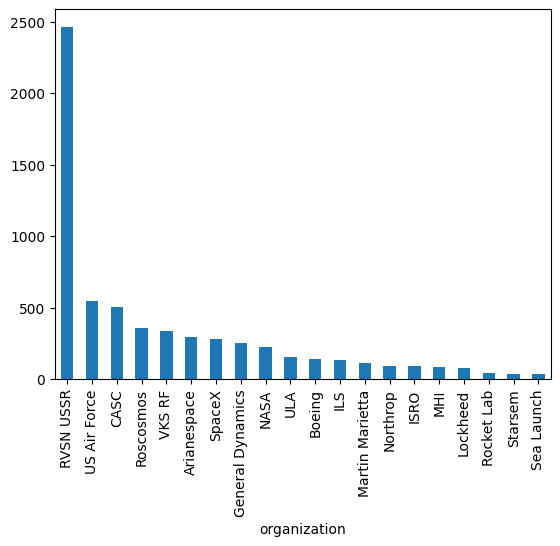

In [24]:
df['organization'].value_counts().iloc[:20].plot(kind='bar')

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

<Axes: title={'center': 'Rocket Status'}, ylabel='count'>

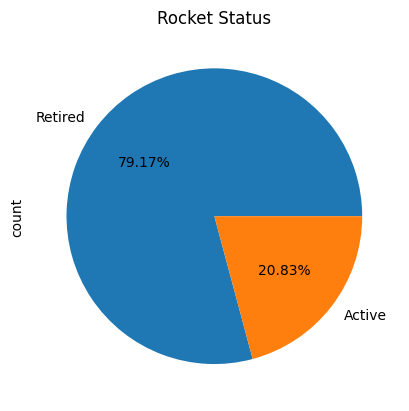

In [32]:
df['rocket_status'].value_counts().plot(kind='pie', autopct='%1.2f%%', title='Rocket Status')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [41]:
df['mission_status'].unique()
df['mission_status'].value_counts()

mission_status
Success              6021
Failure               440
Partial Failure       112
Prelaunch Failure       5
Name: count, dtype: int64

<Axes: title={'center': 'Mission Outcome'}, ylabel='count'>

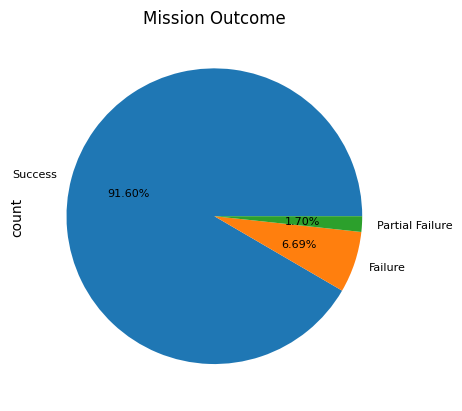

In [45]:
df['mission_status'].value_counts().iloc[:3].plot(kind='pie', 
                                                  autopct='%1.2f%%', 
                                                  title='Mission Outcome', 
                                                  textprops={'fontsize':8}, 
                                                  labeldistance=1.1
                                                 )

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [15]:
df_year_price = df.drop(['location', 'mission_name', 'mission_status', 'organization', 'rocket_name', 'rocket_status'],
        axis=1).sort_values(by=['date']).dropna()

In [16]:
df_year_price

,date,price
4779,1964-09-01 15:00:00,63.23
4784,1964-12-10 16:53:00,63.23
4385,1965-02-11 15:19:00,63.23
4361,1965-05-06 15:00:00,63.23
4842,1966-07-29 18:30:00,59.00
...,...,...
6572,2023-09-20 03:38:00,67.00
6574,2023-09-21 04:59:00,4.90
6575,2023-09-24 03:38:00,67.00
6577,2023-09-25 08:48:00,67.00


Total cost of space launches per year

In [26]:
df_year_price.groupby(df_year_price['date'].dt.year)['price'].sum().head()

date
1964     126.46
1965     126.46
1966     177.00
1967   1,514.00
1968   2,792.00
Name: price, dtype: float64

<Axes: xlabel='date'>

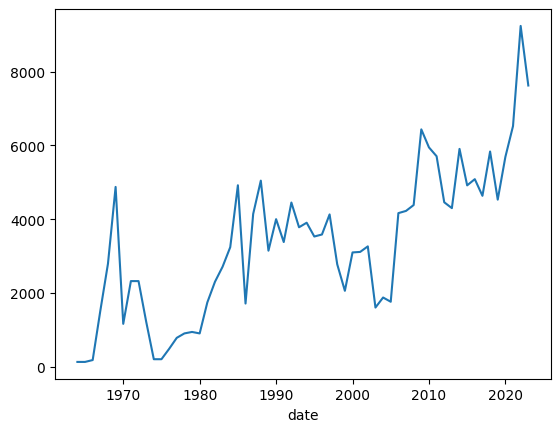

In [25]:
df_year_price.groupby(df_year_price['date'].dt.year)['price'].sum().plot()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [6]:
df['location'].str.split(',').str[-1].str.strip()

0             Iran
1       Kazakhstan
2              USA
3              USA
4            China
           ...    
6573           USA
6574         China
6575           USA
6576           USA
6577         China
Name: location, Length: 6578, dtype: object

In [7]:
df_countries = df
df_countries['location'] = df['location'].str.split(',').str[-1].str.strip()

In [8]:
df_countries.head()

,date,location,mission_name,mission_status,organization,price,rocket_name,rocket_status
0,2023-09-27 06:00:00,Iran,Nour 3,Success,ISA,NaN,Qased,Active
1,2023-09-15 15:44:00,Kazakhstan,Soyuz MS-24,Success,Roscosmos,17.42,Soyuz 2.1a,Active
2,2023-09-10 12:47:00,USA,SILENTBARKER (NROL-107),Success,ULA,153.0,Atlas V 551,Active
3,2023-09-12 06:57:00,USA,Starlink Group 7-2,Success,SpaceX,67.0,Falcon 9 Block 5,Active
4,2023-09-17 04:13:00,China,Yaogan 39 Group 02,Success,CASC,29.75,Long March 2D,Active


In [8]:
df_countries['location'].value_counts()

location
USA                               1989
Russia                            1799
Kazakhstan                        1547
China                              547
France                             323
Japan                              131
India                               91
New Zealand                         38
Pacific Ocean                       36
Iran                                13
Israel                              12
Kenya                                9
Marshall Islands                     9
North Korea                          7
South Korea                          6
Yellow Sea                           6
Australia                            6
Barents Sea                          3
Brazil                               2
Gran Canaria                         2
Pacific Missile Range Facility       1
United Kingdom                       1
Name: count, dtype: int64

In [9]:
def map_to_alpha3_country_code(country_name: str):
    try:
        return countries.get(country_name).alpha3
    except:
        return None

In [10]:
def clean_country_names(country_name: str):
    if country_name == 'Russia':
        return 'Russian Federation'
    if country_name == 'Yellow Sea':
        return 'China'
    if country_name == 'Pacific Missile Range Facility':
        return 'USA'
    if country_name == 'Barents Sea':
        return 'Russian Federation'
    if country_name == 'Gran Canaria':
        return 'USA'
    if country_name == 'United Kingdom':
        return 'United Kingdom of Great Britain and Northern Ireland'
    if country_name == 'North Korea':
        return "Korea, Democratic People's Republic of"
    if country_name == 'South Korea':
        return "Korea, Republic of"
    if country_name == 'Iran':
        return "Iran, Islamic Republic of"
    else:
        return country_name

In [11]:
df_countries['location'] = df_countries['location'].apply(clean_country_names)

In [12]:
df_countries['location'].value_counts()

location
USA                                                     1992
Russian Federation                                      1802
Kazakhstan                                              1547
China                                                    553
France                                                   323
Japan                                                    131
India                                                     91
New Zealand                                               38
Pacific Ocean                                             36
Iran, Islamic Republic of                                 13
Israel                                                    12
Marshall Islands                                           9
Kenya                                                      9
Korea, Democratic People's Republic of                     7
Korea, Republic of                                         6
Australia                                                  6
Brazil         

In [13]:
df_countries['location'] = df_countries['location'].apply(map_to_alpha3_country_code)

In [14]:
df_countries['location'].value_counts()

location
USA    1992
RUS    1802
KAZ    1547
CHN     553
FRA     323
JPN     131
IND      91
NZL      38
IRN      13
ISR      12
MHL       9
KEN       9
PRK       7
KOR       6
AUS       6
BRA       2
GBR       1
Name: count, dtype: int64

In [15]:
df_countries_launches = pd.DataFrame(df_countries['location'].value_counts())

In [18]:
df_countries_launches = df_countries_launches.reset_index()
df_countries_launches.columns = ['location', 'launches']
print(df_countries_launches)

   location  launches
0       USA      1992
1       RUS      1802
2       KAZ      1547
3       CHN       553
4       FRA       323
5       JPN       131
6       IND        91
7       NZL        38
8       IRN        13
9       ISR        12
10      MHL         9
11      KEN         9
12      PRK         7
13      KOR         6
14      AUS         6
15      BRA         2
16      GBR         1


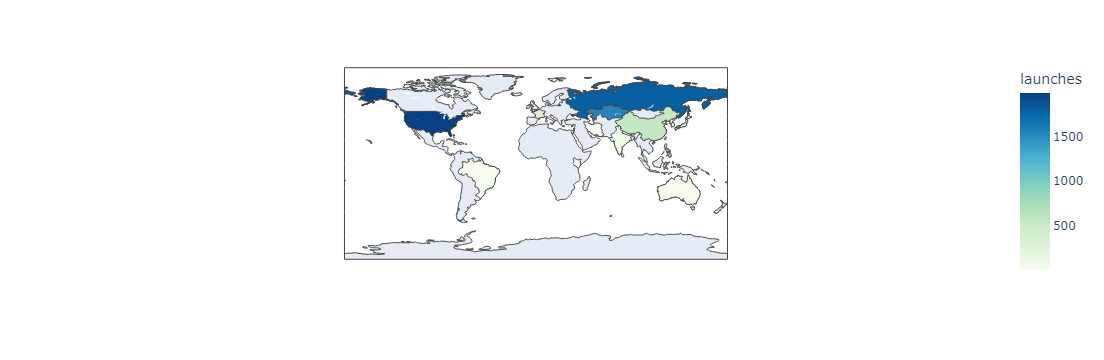

In [23]:
fig = px.choropleth(df_countries_launches, locations="location", color='launches',
                    color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [25]:
df_failed = df_countries[df_countries['mission_status'] == 'Failure']

In [27]:
df_failed_launches = pd.DataFrame(df_failed['location'].value_counts())
df_failed_launches = df_failed_launches.reset_index()
df_failed_launches.columns = ['location', 'failed_launches']
print(df_failed_launches)

   location  failed_launches
0       USA              157
1       KAZ              113
2       RUS               72
3       CHN               27
4       FRA               15
5       JPN               13
6       IND               10
7       IRN                6
8       PRK                5
9       NZL                4
10      AUS                4
11      KOR                3
12      MHL                3
13      ISR                2
14      BRA                2
15      GBR                1


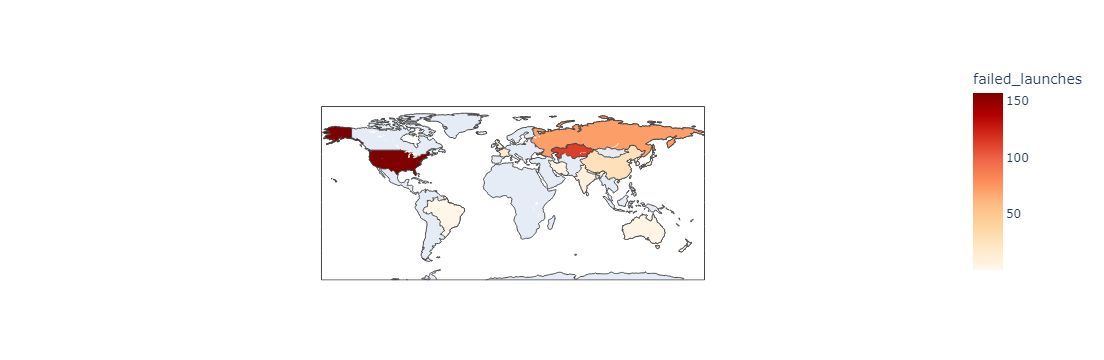

In [29]:
fig = px.choropleth(df_failed_launches, locations="location", color='failed_launches',
                    color_continuous_scale=px.colors.sequential.OrRd)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [39]:
df['organization'].value_counts()

organization
RVSN USSR           2464
US Air Force         546
CASC                 502
Roscosmos            361
VKS RF               337
                    ... 
OKB-586                1
Sandia                 1
OneSpace               1
ABL SS                 1
Relativity Space       1
Name: count, Length: 64, dtype: int64

In [50]:
df.groupby('organization')['price'].sum()

organization
ABL SS                12.00
ABMA                   0.00
AEB                    0.00
ASI                    0.00
Arianespace       18,883.00
                     ...   
UT                     0.00
VKS RF             3,335.94
Virgin Galactic        0.00
Virgin Orbit          72.00
i-Space                0.00
Name: price, Length: 64, dtype: float64

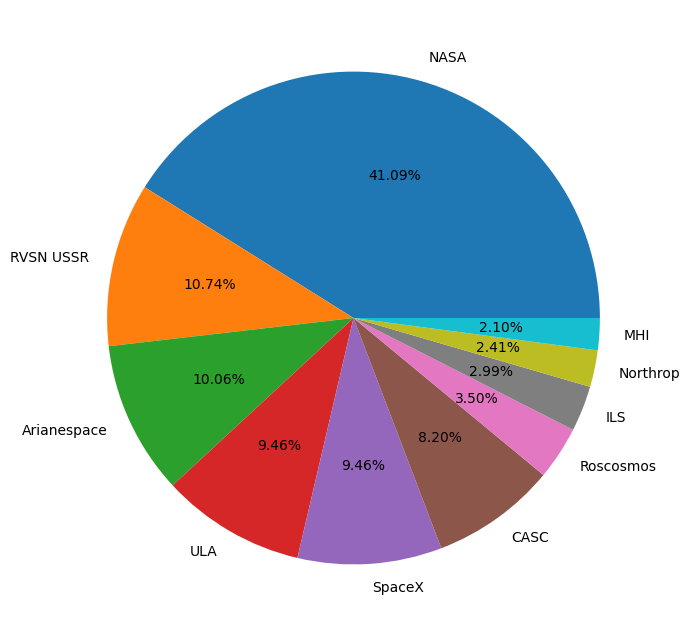

In [63]:
df_money_by_organization = df.groupby('organization')['price'].sum().reset_index()
df_money_by_organization = df_money_by_organization.sort_values(by='price', ascending=False)
df_money_by_organization = df_money_by_organization.iloc[:10]
plt.figure(figsize=(8, 8))
plt.pie(df_money_by_organization['price'], labels=df_money_by_organization['organization'], autopct='%1.2f%%')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


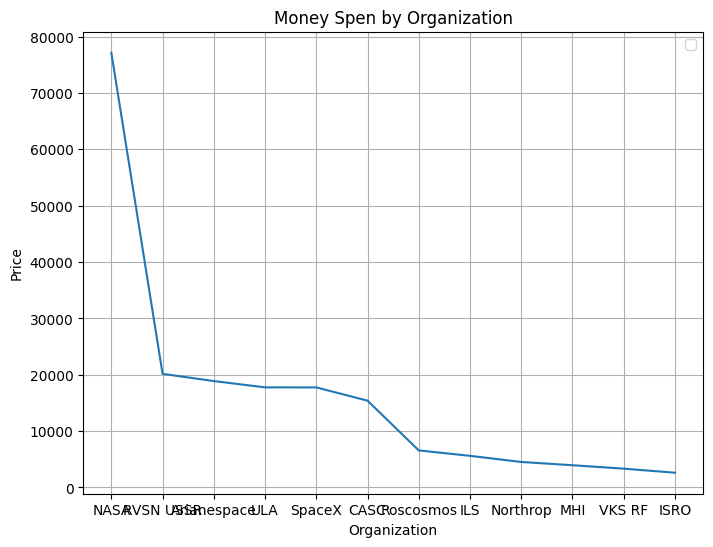

In [62]:
plt.figure(figsize=(8,6))
plt.bar(df_money_by_organization['organization'], df_money_by_organization['price'])
plt.xlabel('Organization')
plt.ylabel('Price')
plt.title('Money Spent by Organization')
plt.legend()
plt.grid(True)
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [5]:
df_nonan = df[df['price'] > 0].reset_index()
result_df = pd.DataFrame({'organization': df_nonan['organization'].unique()})

TypeError: '>' not supported between instances of 'str' and 'int'

In [57]:
result_df['price_per_launch'] = result_df['organization'].map(df.groupby('organization')['price'].sum() / df.groupby('organization')['organization'].count())

In [60]:
result_df

,organization,price_per_launch
0,Roscosmos,18.21
1,ULA,113.14
2,SpaceX,63.86
3,CASC,30.68
4,Firefly,15.00
5,Rocket Lab,7.50
6,Galactic Energy,4.90
7,ISRO,28.71
8,MHI,44.80
9,CASIC,3.16


In [1]:
plt.figure(figsize=(35,6))
plt.bar(result_df['organization'], result_df['price_per_launch'])
plt.xlabel('Organization')
plt.ylabel('Price per Launch')
plt.title('Money Spent by Organization per launch')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

# Chart the Number of Launches per Year

In [14]:
df_years = df

In [20]:
df_years.head()

,date,location,mission_name,mission_status,organization,price,rocket_name,rocket_status,year
5423,1957-12-06 16:44:00,"LC-18A, Cape Canaveral SFS, Florida, USA",Vanguard TV3,Failure,US Navy,NaN,Vanguard,Retired,1957
5420,1957-10-04 19:28:00,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 1,Success,RVSN USSR,NaN,Sputnik 8K71PS,Retired,1957
5422,1957-11-03 02:30:00,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 2,Success,RVSN USSR,NaN,Sputnik 8K71PS,Retired,1957
5426,1958-03-17 12:15:00,"LC-18A, Cape Canaveral SFS, Florida, USA",Vanguard 1,Success,US Navy,NaN,Vanguard,Retired,1958
5427,1958-04-27 09:01:00,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",D-1 n°01,Failure,RVSN USSR,NaN,Sputnik 8A91,Retired,1958


In [15]:
df_years['year'] = df['date'].dt.strftime('%Y')

In [19]:
df_years = df_years.sort_values('year')

In [26]:
df_years['year'].value_counts().sort_index()

year
1957      3
1958     22
1959     24
1960     41
1961     56
       ... 
2019    106
2020    118
2021    156
2022    190
2023    165
Name: count, Length: 67, dtype: int64

<Axes: xlabel='year'>

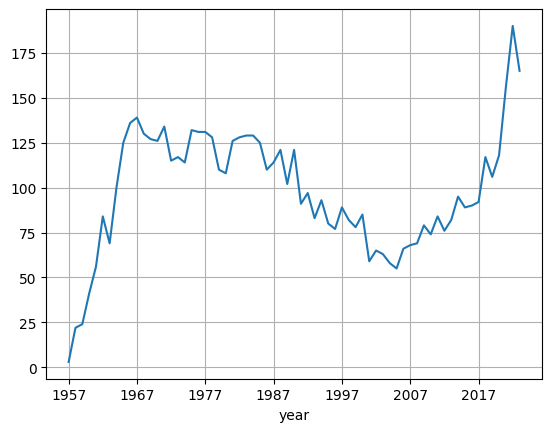

In [28]:
df_years['year'].value_counts().sort_index().plot(grid=True)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [33]:
df['date'].dt.to_period('M').value_counts().sort_index()

date
1957-10     1
1957-11     1
1957-12     1
1958-02     2
1958-03     3
           ..
2023-05    21
2023-06    15
2023-07    18
2023-08    23
2023-09    23
Freq: M, Name: count, Length: 788, dtype: int64

<Axes: xlabel='date'>

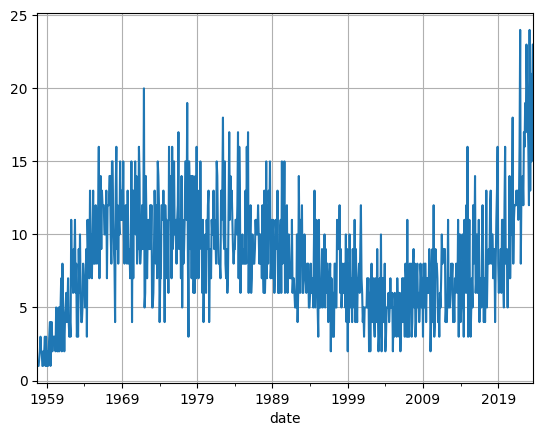

In [34]:
df['date'].dt.to_period('M').value_counts().sort_index().plot(grid=True)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [41]:
df['date'].dt.month.value_counts().sort_index()

date
1     393
2     486
3     516
4     567
5     530
6     593
7     548
8     574
9     587
10    587
11    517
12    680
Name: count, dtype: int64

<Axes: xlabel='Month', ylabel='Launches'>

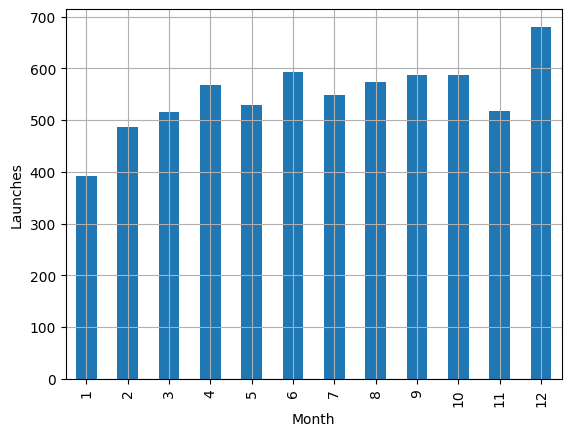

In [43]:
df['date'].dt.month.value_counts().sort_index().plot(kind='bar', grid=True, xlabel='Month', ylabel='Launches')

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [47]:
df_clean = df[df['price'] > 0].reset_index()
df_clean = pd.DataFrame({'date': df_clean['date'].dt.year,
                       'price': df_clean['price']})

In [54]:
average_price_per_year = df_clean.groupby('date')['price'].mean().reset_index().sort_index()

In [59]:
average_price_per_year

,date,price
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,216.29
4,1968,279.20
5,1969,609.50
6,1970,"1,160.00"
7,1971,"1,160.00"
8,1972,"1,160.00"
9,1973,305.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


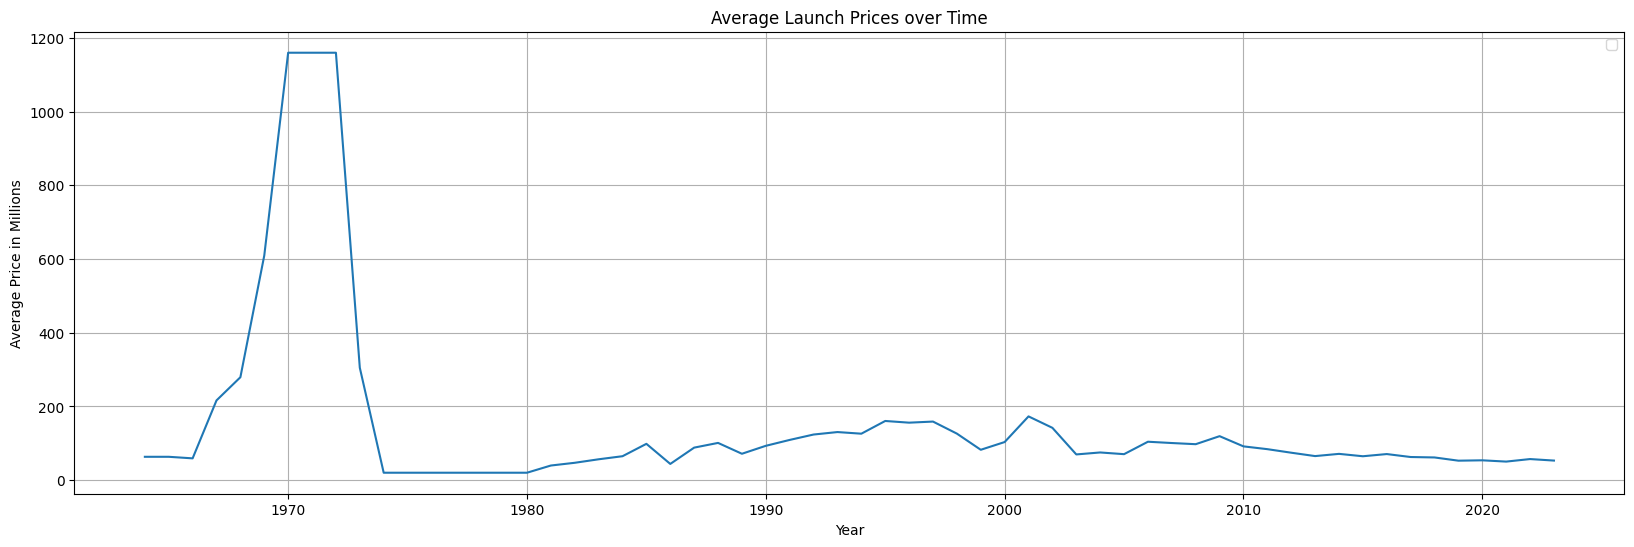

In [63]:
plt.figure(figsize=(20,6))
plt.plot(average_price_per_year['date'], average_price_per_year['price'])
plt.xlabel('Year')
plt.ylabel('Average Price in Millions')
plt.title('Average Launch Prices over Time')
plt.legend()
plt.grid(True)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [73]:
df['organization'].value_counts().sort_values(ascending=False).iloc[:10]

organization
RVSN USSR           2464
US Air Force         546
CASC                 502
Roscosmos            361
VKS RF               337
Arianespace          296
SpaceX               278
General Dynamics     250
NASA                 222
ULA                  157
Name: count, dtype: int64

In [74]:
top_10_organizations = df['organization'].value_counts().sort_values(ascending=False).iloc[:10].index

In [79]:
df_top_10 = df[df['organization'].isin(top_10_organizations)]
df_top_10.reset_index().head()

,index,date,location,mission_name,mission_status,organization,price,rocket_name,rocket_status,year
0,1,2023-09-15 15:44:00,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Soyuz MS-24,Success,Roscosmos,17.42,Soyuz 2.1a,Active,2023
1,2,2023-09-10 12:47:00,"SLC-41, Cape Canaveral SFS, Florida, USA",SILENTBARKER (NROL-107),Success,ULA,153.00,Atlas V 551,Active,2023
2,3,2023-09-12 06:57:00,"SLC-4E, Vandenberg SFB, California, USA",Starlink Group 7-2,Success,SpaceX,67.00,Falcon 9 Block 5,Active,2023
3,4,2023-09-17 04:13:00,"LC-3, Xichang Satellite Launch Center, China",Yaogan 39 Group 02,Success,CASC,29.75,Long March 2D,Active,2023
4,6,2023-09-20 03:38:00,"SLC-40, Cape Canaveral SFS, Florida, USA",Starlink Group 6-17,Success,SpaceX,67.00,Falcon 9 Block 5,Active,2023


In [83]:
organizations_years = df_top_10.groupby(['year', 'organization']).size().reset_index(name='count')
pivot_organizations_years = organizations_years.pivot(index='year', columns='organization', values='count').fillna(0)

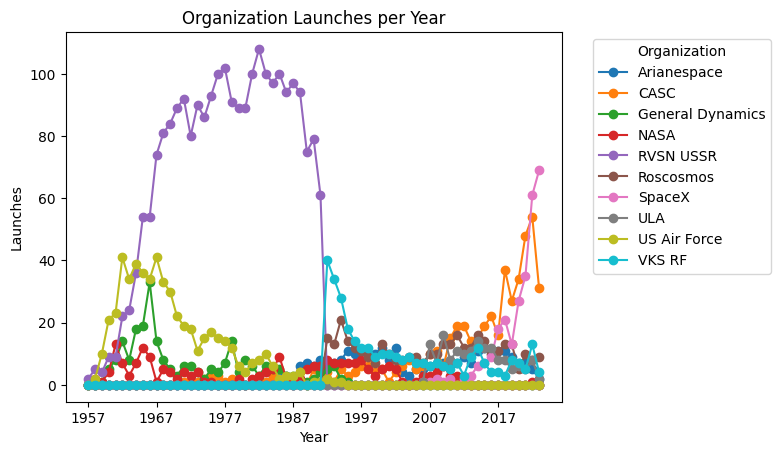

In [94]:
pivot_organizations_years.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Launches')
plt.title('Organization Launches per Year')
plt.legend(title='Organization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [8]:
df_cold_war = df.query("date < '1991-12-31' and date >= '1948-01-01'")

In [14]:
df_cold_war.reset_index()

,index,date,location,mission_name,mission_status,organization,price,rocket_name,rocket_status
0,2391,1991-10-23 15:25:00,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Gorizont 24,Success,RVSN USSR,NaN,Proton K/Block-DM-2,Retired
1,2392,1991-11-08 07:07:00,"SLC-4E, Vandenberg SFB, California, USA",SLDCOM & NOSS 3x,Success,Martin Marietta,NaN,Titan IV(403)A,Retired
2,2393,1991-10-29 23:08:00,"ELA-2, Guiana Space Centre, French Guiana, France",Intelsat 6AF1,Success,Arianespace,NaN,Ariane 44L,Retired
3,2394,1991-11-12 20:09:00,"Site 32/1, Plesetsk Cosmodrome, Russia",Cosmos 2165 to 2170,Success,RVSN USSR,NaN,Tsyklon-3,Retired
4,2395,1991-11-22 13:27:00,"Site 81/23, Baikonur Cosmodrome, Kazakhstan",Cosmos 2172,Success,RVSN USSR,NaN,Proton K/Block-DM-2,Retired
...,...,...,...,...,...,...,...,...,...
3693,6094,1991-09-28 07:05:00,"Site 32/2, Plesetsk Cosmodrome, Russia",Cosmos 2157 to 2162,Success,RVSN USSR,NaN,Tsyklon-3,Retired
3694,6095,1991-10-02 05:59:00,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Soyuz TM-13,Success,RVSN USSR,40.00,Soyuz U2,Retired
3695,6096,1991-10-04 18:09:00,"Site 43/4, Plesetsk Cosmodrome, Russia",Foton 7,Success,RVSN USSR,20.00,Soyuz U,Retired
3696,6097,1991-10-10 14:00:00,"Site 132/1, Plesetsk Cosmodrome, Russia",Cosmos 2164,Success,RVSN USSR,NaN,Cosmos-3M,Retired


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [21]:
df_cold_war_countries = df_cold_war.copy()
df_cold_war_countries['location'] = df_cold_war['location'].str.split(',').str[-1].str.strip()

In [23]:
def cold_war_country_names(country_name: str):
    if country_name == 'Russia':
        return 'USSR'
    if country_name == 'Kazakhstan':
        return 'USSR'
    if country_name == 'Yellow Sea':
        return 'China'
    if country_name == 'Pacific Missile Range Facility':
        return 'USA'
    if country_name == 'Barents Sea':
        return 'USSR'
    if country_name == 'Gran Canaria':
        return 'USA'
    else:
        return country_name

In [32]:
df_cold_war_countries['location'] = df_cold_war_countries['location'].apply(cold_war_country_names)
colors = ['red', 'blue']

<Axes: title={'center': 'Superpower Launches'}, ylabel='count'>

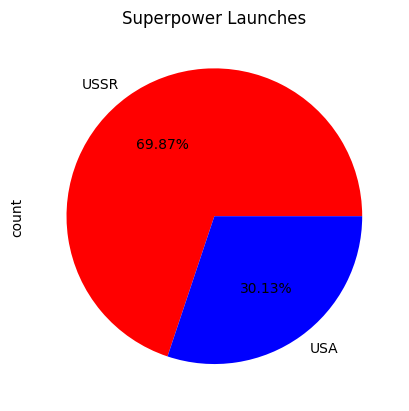

In [33]:
df_cold_war_countries['location'].value_counts().iloc[:2].plot(kind='pie', 
                                                               autopct='%1.2f%%', 
                                                               title='Superpower Launches',
                                                               colors=colors
                                                              )

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 